### **CSE530: Assignment#1 Report**
#### Ajay Narayanan Sridhar , PSU ID : 970750943

In this notebook, we will be performing ablation studies on the effect of cache parameters on the following kernels 

* 2-D Matrix column wise copy 
* 2-D Matrix transpose
* 2-D Matrix gather 
* 2-D Matrix scatter 



NOTE: 

* Kernel code can be found in ./content/CachePerformanceOnMatMul/src
* Traces can be found in ./content/CachePerformanceOnMatMul/traces
* Logs can be found in ./content/CachePerformanceOnMatMul/logs 
* All our experiments use a matrix size of 10x10 with a sparsity of 50% and has no optimization on storing sparse matrices.

In [1]:
import pathlib
import pickle 
import pprint
import matplotlib.pyplot as plt

In [2]:
# setup root directory path
abs_root_dir = pathlib.Path().parent.resolve()
print(abs_root_dir)

/home/ajay/Documents/CSE_530/Assignments/assignment_1/question


In [3]:
# change directory to the source files
%cd $abs_root_dir/content/CachePerformanceOnMatMul/

/home/ajay/Documents/CSE_530/Assignments/assignment_1/question/content/CachePerformanceOnMatMul


In [ ]:
# To run experiments again, use the following command 
!source ./run_kernel.sh 10 10 1 '50' input_matrix.in true clean

In [53]:
traces = ["mat_scatter", "mat_gather", "mat_transpose", "mat_column_wise_copy"]

In [5]:
def read_pkl_contents(tracename):
    """
    Reads contents of pkl file 
    """
    data = []
    filename = f"{abs_root_dir}/content/CachePerformanceOnMatMul/Simulator/logs/{tracename}/{tracename}.pkl"
    with open(filename, 'rb') as fr:
        try:
            while True:
                data.append(pickle.load(fr))
        except EOFError:
            pass
    return data

In [54]:
# load pkl data into object
all_data = {}
for tracename in traces:
    all_data[tracename] = read_pkl_contents(tracename)

# print(pprint.pformat(all_data))

In [7]:
# change font size for x label
plt.rc('xtick', labelsize=4)    

def convert_dict_to_list(experiments, results):
    ans = []
    for experiment in experiments:
        ans.append(results[experiment])
    return ans


In [62]:
# plotting for each config
def plot_each_cache_data(plt_obj, data, type, title, experiments=None):
    if experiments is None :
        experiments = []
        for result in data:
            experiments.append(result["experiment_name"])

    cache_1_results = {}
    cache_2_results = {}
    cache_3_results = {}
    for result in data:
        if result["experiment_name"] in experiments:
            cache_1_results[result["experiment_name"]] = (result["caches"].get("cache_1", {}).get(type, -1))
            cache_2_results[result["experiment_name"]] = (result["caches"].get("cache_2", {}).get(type, -1))
            cache_3_results[result["experiment_name"]] = (result["caches"].get("cache_3", {}).get(type, -1))        
    
    cache_1_results = convert_dict_to_list(experiments, cache_1_results)
    cache_2_results = convert_dict_to_list(experiments, cache_2_results)
    cache_3_results = convert_dict_to_list(experiments, cache_3_results)
    print(experiments, cache_1_results, cache_2_results, cache_3_results)

    plt_obj.plot(experiments, cache_1_results, marker='o', color='blue', linestyle='--', label=f'{type} for cache level 1')
    plt_obj.plot(experiments, cache_2_results, marker='o', color='orange', linestyle='--', label=f'{type} for cache level 2')
    plt_obj.plot(experiments, cache_3_results, marker='o', color='green', linestyle='--', label=f'{type} for cache level 3')

    # plt_obj.bar(experiments, cache_1_results, color='blue', label=f'{type} for cache level 1')
    # plt_obj.bar(experiments, cache_2_results, color='orange', label=f'{type} for cache level 2')
    # plt_obj.bar(experiments, cache_3_results, color='green', label=f'{type} for cache level 3')
    plt_obj.set_title(title, loc='left')
    plt_obj.legend()

def plot_amat(plt_obj, data, type, title, experiments=None):
    if experiments is None :
        experiments = []
        for result in data:
            experiments.append(result["experiment_name"])

    cache_1_results = {}
    cache_2_results = {}
    cache_3_results = {}
    for result in data:
        if result["experiment_name"] in experiments:
            cache_1_results[result["experiment_name"]] = (result["caches"].get("cache_1", {}).get(type, -1))
            cache_2_results[result["experiment_name"]] = (result["caches"].get("cache_2", {}).get(type, -1))
            cache_3_results[result["experiment_name"]] = (result["caches"].get("cache_3", {}).get(type, -1))        
    
    cache_1_results = convert_dict_to_list(experiments, cache_1_results)
    cache_2_results = convert_dict_to_list(experiments, cache_2_results)
    cache_3_results = convert_dict_to_list(experiments, cache_3_results)
    print(experiments, cache_1_results, cache_2_results, cache_3_results)

    # plt_obj.plot(experiments, cache_1_results, marker='o', color='blue', linestyle='--', label=f'{type} for cache level 1')
    # plt_obj.plot(experiments, cache_2_results, marker='o', color='orange', linestyle='--', label=f'{type} for cache level 2')
    # plt_obj.plot(experiments, cache_3_results, marker='o', color='green', linestyle='--', label=f'{type} for cache level 3')

    plt_obj.bar(experiments, cache_1_results, color='blue', label=f'{type} for cache level 1')
    plt_obj.bar(experiments, cache_2_results, color='orange', label=f'{type} for cache level 2')
    plt_obj.bar(experiments, cache_3_results, color='green', label=f'{type} for cache level 3')
    plt_obj.set_title(title, loc='left')
    plt_obj.legend()

# plotting rate for each config
def plot_rate(plt_obj, data, type, title, experiments=None):
    if experiments is None :
        experiments = []
        for result in data:
            experiments.append(result["experiment_name"])
    cache_1_results = {}
    cache_2_results = {}
    cache_3_results = {}
    for result in data:
        if result["experiment_name"] in experiments:
            cache_1_results[result["experiment_name"]] = (result["caches"].get("cache_1", {}).get(type, -1)/result["caches"].get("cache_1", {}).get("n_access", -1))
            cache_2_results[result["experiment_name"]] = (result["caches"].get("cache_2", {}).get(type, -1)/result["caches"].get("cache_2", {}).get("n_access", -1))
            cache_3_results[result["experiment_name"]] = (result["caches"].get("cache_3", {}).get(type, -1)/result["caches"].get("cache_3", {}).get("n_access", -1))

    cache_1_results = convert_dict_to_list(experiments, cache_1_results)
    cache_2_results = convert_dict_to_list(experiments, cache_2_results)
    cache_3_results = convert_dict_to_list(experiments, cache_3_results)
    print(experiments, cache_1_results, cache_2_results, cache_3_results)
    
    plt_obj.plot(experiments, cache_1_results, marker='o', color='blue', linestyle='--', label=f'{type.split("_")[1]} rate for cache level 1')
    plt_obj.plot(experiments, cache_2_results, marker='o', color='orange', linestyle='--', label=f'{type.split("_")[1]} rate for cache level 2')
    plt_obj.plot(experiments, cache_3_results, marker='o', color='green', linestyle='--', label=f'{type.split("_")[1]} rate for cache level 3')
    plt_obj.set_title(title, loc='left')
    plt_obj.legend()

# plotting rate for each config
def plot_cycles(plt_obj, data, title, experiments=None):
    if experiments is None :
        experiments = []
        for result in data:
            experiments.append(result["experiment_name"])
    results = []
    for result in data:
        if result["experiment_name"] in experiments:
            results.append(result["tot_cycles"])
    print(experiments, results)
    plt_obj.plot(experiments, results, marker='o', color='blue', linestyle='--')
    plt_obj.set_title(title, loc='center')



# **Cache Study - Scatter Kernel**

Scatter operation writes data to a given matrix from a list of indices which are random in nature. Since the operations are arbitary, i.e, no spatial and temporal locality, we expect our cache results to match with that of any general cache study. 

## Experiments on number of cache layers 

Here we consider 3 level cache, 2 level cache and 1 level cache and plot amat vs cache layer graph

['config_1_level_cache_base', 'config_2_level_cache_base', 'config_3_level_cache_base'] [21200, 21200, 21200] [-1, 5057, 5057] [-1, -1, 1932]


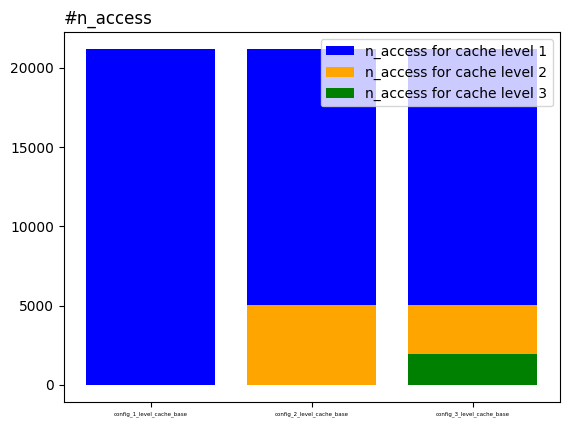

In [67]:
figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_1_level_cache_base", "config_2_level_cache_base", "config_3_level_cache_base"]
plot_amat(axis, all_data["mat_scatter"], "n_access", "#n_access", experiments)

## Experiments on Block size 

Here we take the 3 level cache as base and reduce its block size by half, and also increase the base's block size twice. 

### Number  of misses and hits vs Block Size

['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [10359, 5982, 3785] [4263, 2190, 1162] [1293, 745, 485]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [10841, 15218, 17415] [4335, 2864, 2092] [2529, 1296, 627]


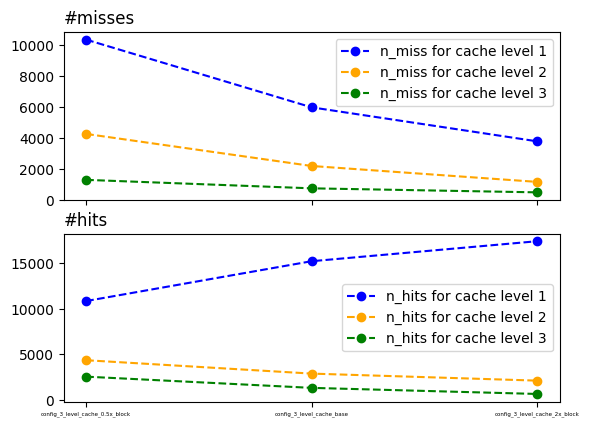

In [15]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_each_cache_data(axis[0], all_data["mat_scatter"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_scatter"], "n_hits", "#hits", experiments)

We observe the following for number of misses/hits vs block size,
* Increasing block size -> Reduces number of misses in all cache layers
* Increasing block size -> Increases number of hits in L1 cache and slightly reduces number of hits in L2 and L3 cache

### Miss and hit rate vs block size

['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [0.4886320754716981, 0.2821698113207547, 0.1785377358490566] [0.49581297976273553, 0.4333201424614167, 0.35709895513214507] [0.33830455259026687, 0.3650171484566389, 0.43615107913669066]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [0.5113679245283019, 0.7178301886792453, 0.8214622641509434] [0.5041870202372645, 0.5666798575385833, 0.6429010448678549] [0.6616954474097331, 0.6349828515433611, 0.5638489208633094]


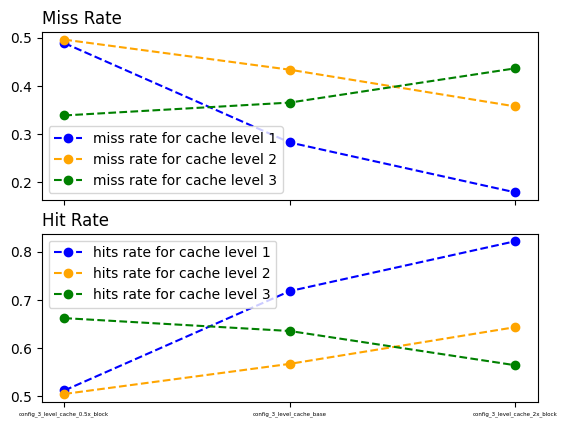

In [24]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_rate(axis[0], all_data["mat_scatter"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_scatter"], "n_hits", "Hit Rate", experiments)

We observe the following for number of miss/hit rate vs block size,
* Increasing block size -> Reduces miss rate in L1 and L2 caches but increases slightly in L3 cache
* Increasing block size -> Increases hit rate in L1 and L2 cache and slightly reduces the hit rate in L3 cache

We believe the deviation in L3 layer is due to the reduced number of access to L3 cache.

### Number of cycles vs block size

['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [2685436, 836444, 1413368]


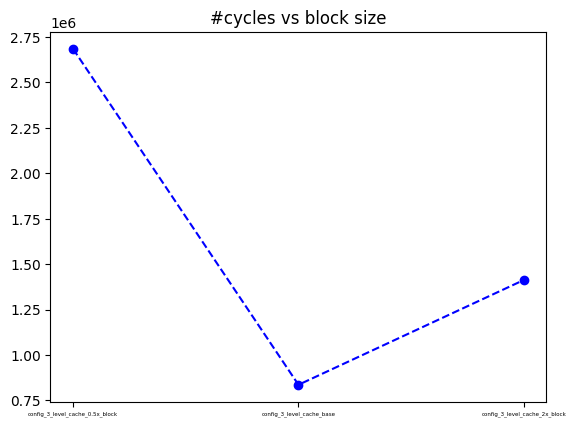

In [25]:
figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_cycles(axis, all_data["mat_scatter"], "#cycles vs block size", experiments)

* Increasing block size -> Reduces the number of cycles taken to complete and then the #cycles increases. We conclude that the base model with block size of 16 works the best.


## Experiments on Cache Associativity 

Here we take the 3 level cache as base and reduce the associativity of L1 cache size by half, and also increase the base's L1 cache associativity twice. 

### Number of misses and hits vs Associativity 

['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [6426, 5982, 5906] [2121, 2190, 2191] [745, 745, 752]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [14774, 15218, 15294] [3109, 2864, 2846] [1252, 1296, 1272]


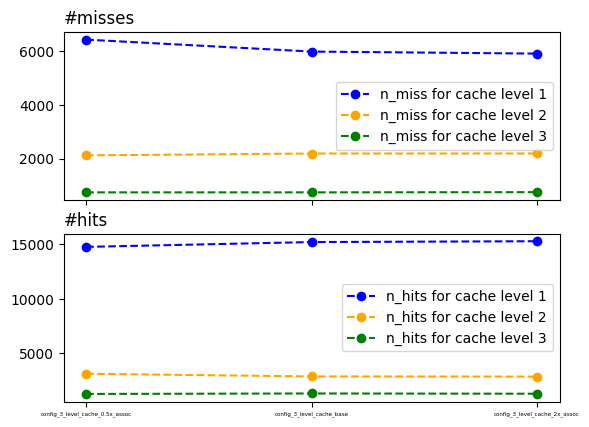

In [26]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_each_cache_data(axis[0], all_data["mat_scatter"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_scatter"], "n_hits", "#hits", experiments)

We observe the following for number of misses/hits vs Associativity,
* Increasing associativity from 1 to 4 in L1 cache -> Reduces number of misses in L1 cache but this change doesn't propage to other higher layers. 

The opposite is observed for number of hits.

### Miss and hit rate vs Associativity

['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [0.3031132075471698, 0.2821698113207547, 0.27858490566037736] [0.4055449330783939, 0.4333201424614167, 0.4349811395672027] [0.37305958938407613, 0.3650171484566389, 0.3715415019762846]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [0.6968867924528301, 0.7178301886792453, 0.7214150943396226] [0.5944550669216061, 0.5666798575385833, 0.5650188604327973] [0.6269404106159239, 0.6349828515433611, 0.6284584980237155]


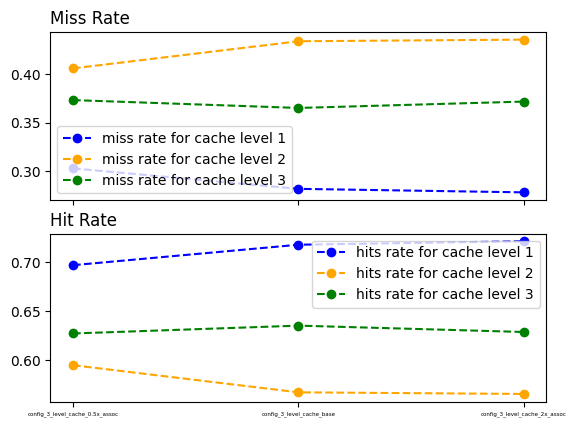

In [27]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_rate(axis[0], all_data["mat_scatter"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_scatter"], "n_hits", "Hit Rate", experiments)

Increasing associativity of L1 cache, reduces miss rate in L1. However, a similar observation as that of above is found here, i.e, miss rate is compensated in higher layers (L2, L3) 

### Number of cycles vs Associativity

['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [1423520, 1407276, 1413368]


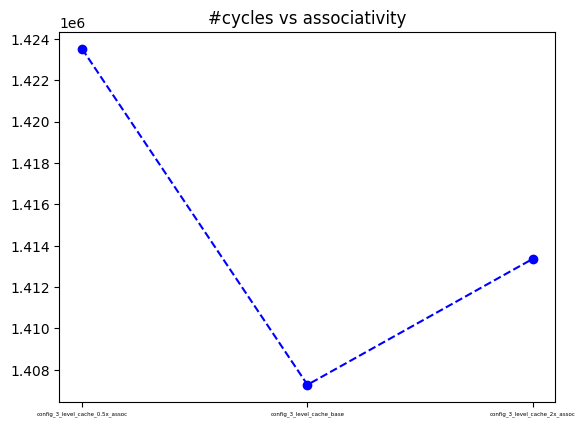

In [20]:
figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_cycles(axis, all_data["mat_scatter"], "#cycles vs associativity", experiments)

* Increasing associativity size -> Reduces the number of cycles taken to complete and then the #cycles increases. We conclude that the base model with associativity of 2 runs in least number of cycles.


## Experiments on Cache Capacity 

Here we take the 3 level cache as base and reduce the L1 cache capacity by half, and also increase the base's L1 cache capacity twice. 

### Number of misses and hits vs Cache Capacity

['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [7990, 5982, 4419] [2267, 2190, 2145] [751, 745, 758]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [13210, 15218, 16781] [4288, 2864, 1623] [1345, 1296, 1204]


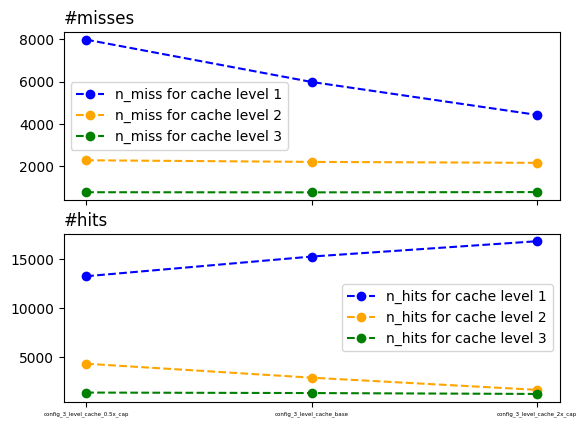

In [28]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_each_cache_data(axis[0], all_data["mat_scatter"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_scatter"], "n_hits", "#hits", experiments)

We observe the following for number of misses/hits vs Cache Capacity,
* Increasing Cache Capacity from 8 to 32 in L1 cache -> Reduces number of misses in L1 cache by a huge margin but this change doesn't propage to other higher layers. 

The opposite is observed for number of hits.

### Miss and hit rate vs Cache Capacity

['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [0.3768867924528302, 0.2821698113207547, 0.20844339622641508] [0.34584286803966435, 0.4333201424614167, 0.5692675159235668] [0.3583015267175573, 0.3650171484566389, 0.38634046890927626]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [0.6231132075471698, 0.7178301886792453, 0.7915566037735849] [0.6541571319603356, 0.5666798575385833, 0.4307324840764331] [0.6416984732824428, 0.6349828515433611, 0.6136595310907238]


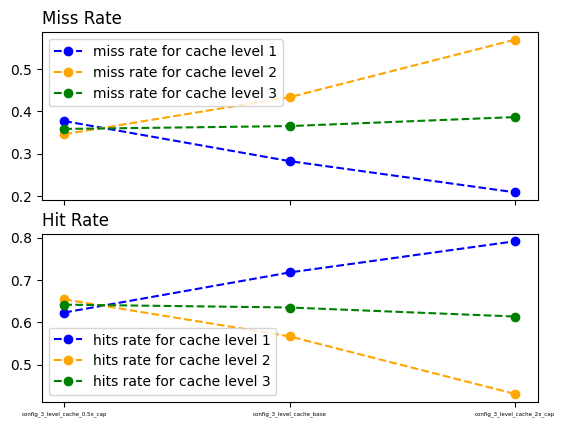

In [29]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_rate(axis[0], all_data["mat_scatter"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_scatter"], "n_hits", "Hit Rate", experiments)

* Increasing L1 cache capacity improves the hit rate. However, L2 and L3 suffer a loss in hit rate. We believe that this is due to cache capacity of L1 being almost similar to that of L2. 

Thus, we can conclude that the L2, L3 layer should have higher cache capacity when compared to L1 in order to optimize for hit rate

### Number of cycles vs Cache Capacity

['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [1448168, 1385748, 1413368]


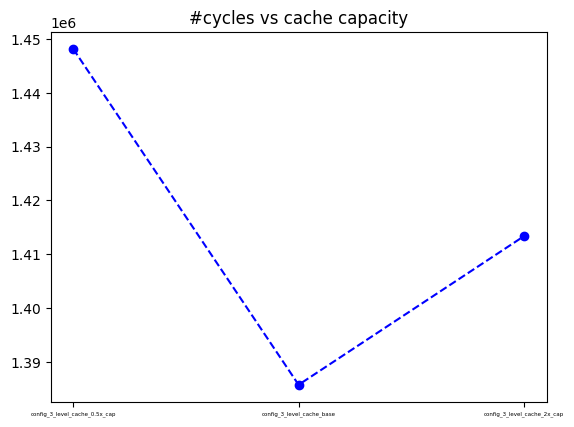

In [31]:
figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_cycles(axis, all_data["mat_scatter"], "#cycles vs cache capacity", experiments)

# **Cache Study - Gather Kernel**

Gather operation reads data from random indices of a given matrix. Since the operations are arbitary, i.e, no spatial and temporal locality, we expect our cache results to match with that of general cache study. 

## Experiments on number of cache layers 

Here we consider 3 level cache, 2 level cache and 1 level cache and plot amat vs cache layer graph

['config_1_level_cache_base', 'config_2_level_cache_base', 'config_3_level_cache_base'] [61957, 61957, 61957] [-1, 15406, 15406] [-1, -1, 4179]


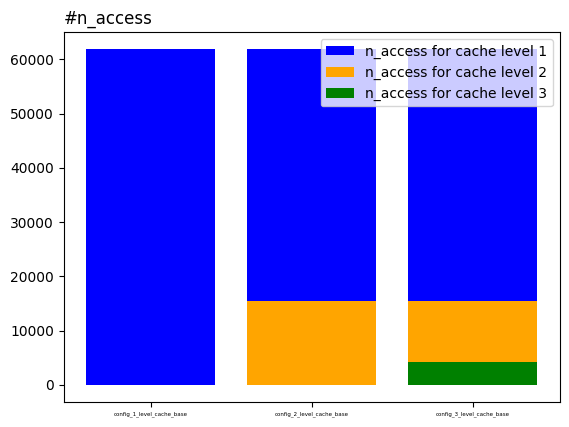

In [68]:
figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_1_level_cache_base", "config_2_level_cache_base", "config_3_level_cache_base"]
plot_amat(axis, all_data["mat_gather"], "n_access", "#n_access", experiments)

## Experiments on Cache Capacity 

Here we take the 3 level cache as base and reduce the L1 cache capacity by half, and also increase the base's L1 cache capacity twice. 

['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [24711, 18243, 13016] [4477, 4421, 4265] [773, 766, 769]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [37246, 43714, 48941] [15583, 10985, 6489] [3536, 3413, 3267]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [0.39884113175266717, 0.29444614813499687, 0.21008118533821843] [0.2231804586241276, 0.28696611709723485, 0.39659661521294404] [0.17939197029473195, 0.18329743957884662, 0.19053518334985134]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [0.6011588682473328, 0.7055538518650032, 0.7899188146617816] [0.7768195413758724, 0.7130338829027651, 0.603403384787056] [0.820608029705268, 0.8167025604211534, 0.8094648166501487]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [2103197, 1917753, 1980873]


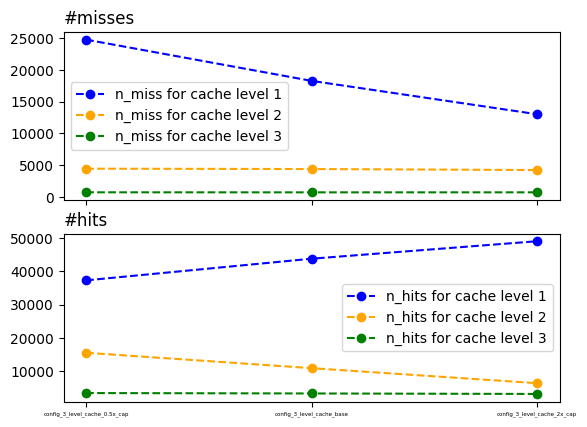

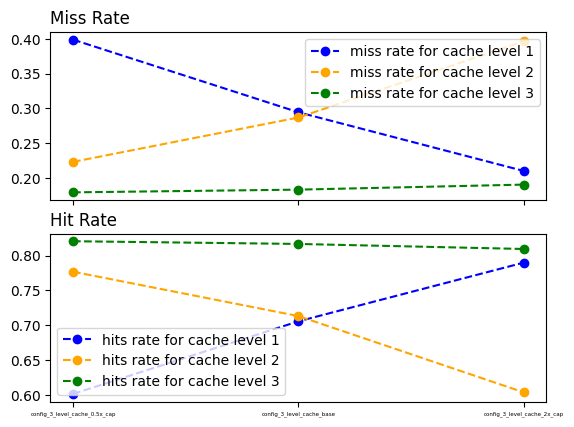

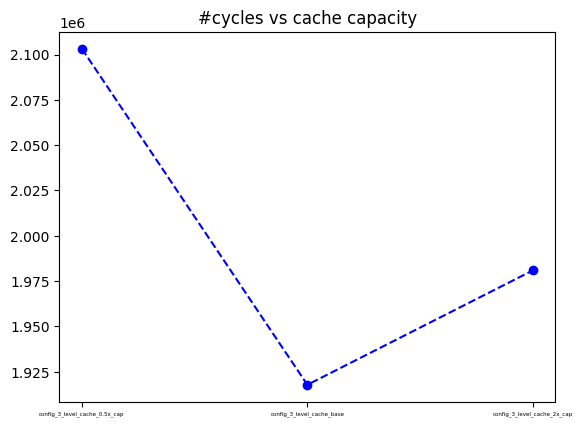

In [39]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_each_cache_data(axis[0], all_data["mat_gather"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_gather"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_rate(axis[0], all_data["mat_gather"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_gather"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_cycles(axis, all_data["mat_gather"], "#cycles vs cache capacity", experiments)

## Experiments on Cache Associativity 

Here we take the 3 level cache as base and reduce the associativity of L1 cache size by half, and also increase the base's L1 cache associativity twice. 

['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [20051, 18243, 18136] [4342, 4421, 4642] [762, 766, 763]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [41906, 43714, 43821] [11611, 10985, 10660] [3399, 3413, 3513]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [0.32362767726003516, 0.29444614813499687, 0.2927191439223978] [0.2721745126308531, 0.28696611709723485, 0.3033590380342439] [0.18312905551550107, 0.18329743957884662, 0.1784377923292797]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [0.6763723227399648, 0.7055538518650032, 0.7072808560776022] [0.7278254873691469, 0.7130338829027651, 0.6966409619657561] [0.8168709444844989, 0.8167025604211534, 0.8215622076707203]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [2044105, 2000229, 

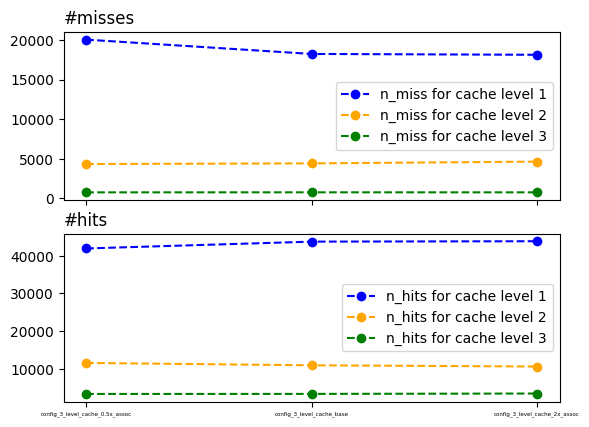

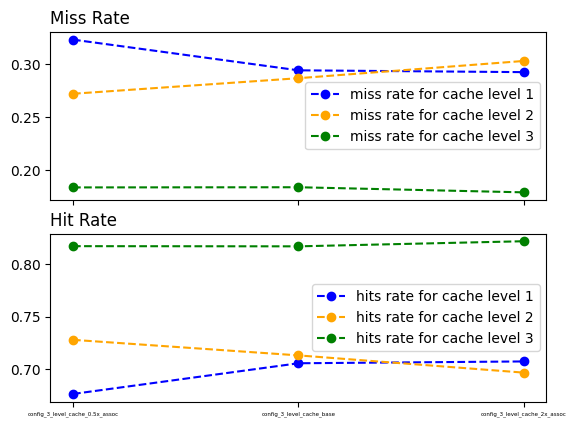

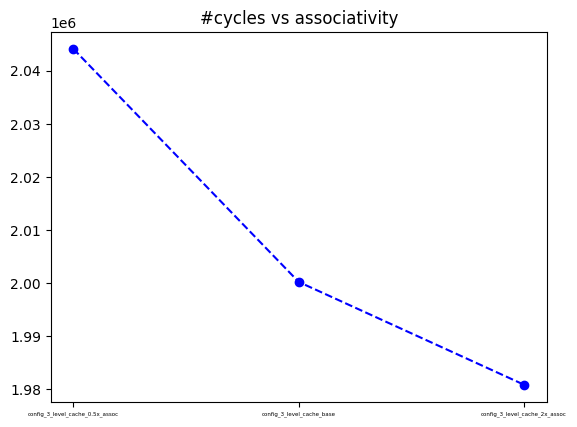

In [43]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_each_cache_data(axis[0], all_data["mat_gather"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_gather"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_rate(axis[0], all_data["mat_gather"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_gather"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_cycles(axis, all_data["mat_gather"], "#cycles vs associativity", experiments)

## Experiments on Block size 

Here we take the 3 level cache as base and reduce its block size by half, and also increase the base's block size twice. 

['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [29431, 18243, 12225] [10561, 4421, 2664] [1346, 766, 490]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [32526, 43714, 49732] [13623, 10985, 7961] [8090, 3413, 2123]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [0.4750229998224575, 0.29444614813499687, 0.19731426634601418] [0.4366936817730731, 0.28696611709723485, 0.25072941176470587] [0.14264518863925393, 0.18329743957884662, 0.18752391886720246]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [0.5249770001775425, 0.7055538518650032, 0.8026857336539859] [0.5633063182269269, 0.7130338829027651, 0.7492705882352941] [0.8573548113607461, 0.8167025604211534, 0.8124760811327976]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [4146517, 124921

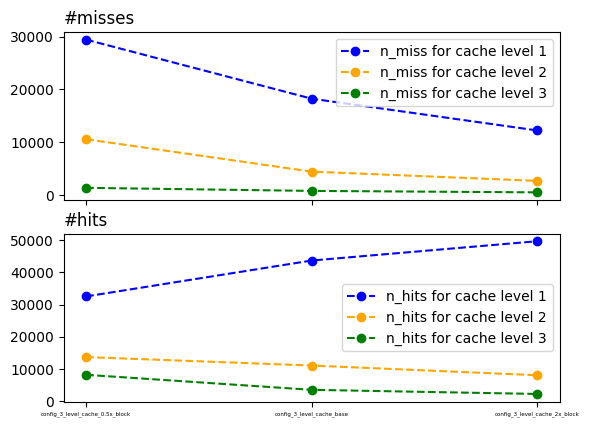

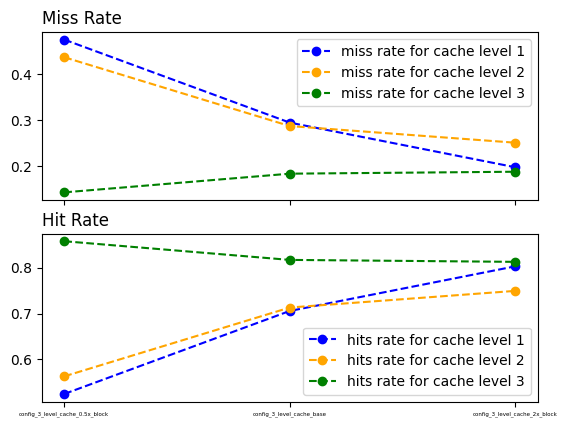

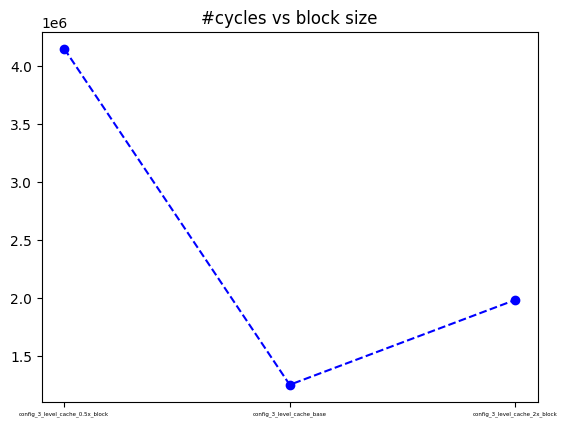

In [44]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_each_cache_data(axis[0], all_data["mat_gather"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_gather"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_rate(axis[0], all_data["mat_gather"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_gather"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_cycles(axis, all_data["mat_gather"], "#cycles vs block size", experiments)

We observe the following for gather kernel after playing around with the cache parameters

* Increasing block size from 8 to 32. 
    - Increases #hits, hit rate for L1 cache
    - Decreases #cycles and then increases 
* Increasing associativity from 1 to 4
    - Reduces #misses, miss rate for L1 cache
    - Decreases #cycles and then increases 
* Increasing cache capacity from 8 to 32
    - Increases #hits, hit rates
    - Decreases #cycles and then increases   

# **Cache Study - Transpose Kernel**

Transpose operation reads exchanges columns and rows of a given matrix. We implement a naive kernel in this case and observe the effects of temporal and spatial locality. We theorize that the naive implementation, having minimal spatial and temporal locality will not be cache friendly.  

## Experiments on Block size 

Here we take the 3 level cache as base and reduce its block size by half, and also increase the base's block size twice. 


['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [38073, 23990, 15646] [13551, 5545, 3258] [1476, 729, 479]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [44994, 59077, 67421] [18017, 14088, 10079] [11134, 4648, 2725]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [0.4583408573801871, 0.2888030144341315, 0.18835397931790002] [0.4292638114546376, 0.2824326389242602, 0.24428282222388842] [0.11704996034892942, 0.13557745954993491, 0.14950062421972535]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [0.541659142619813, 0.7111969855658685, 0.8116460206821] [0.5707361885453623, 0.7175673610757398, 0.7557171777761116] [0.8829500396510706, 0.8644225404500651, 0.8504993757802747]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [4961291, 1389719, 2

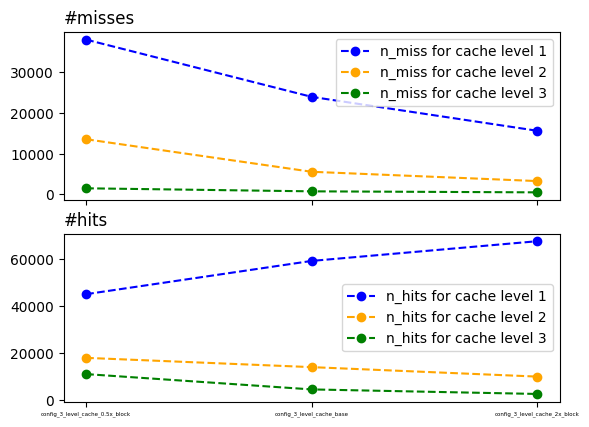

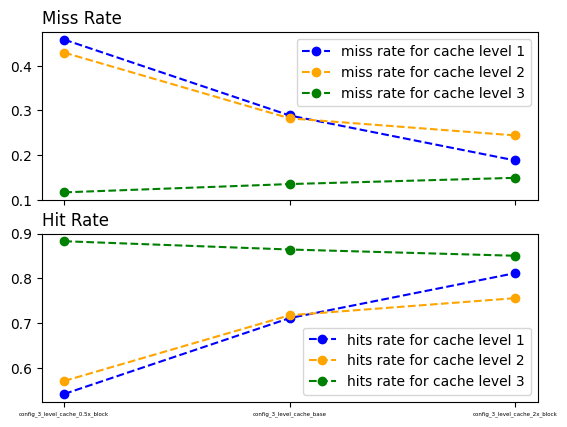

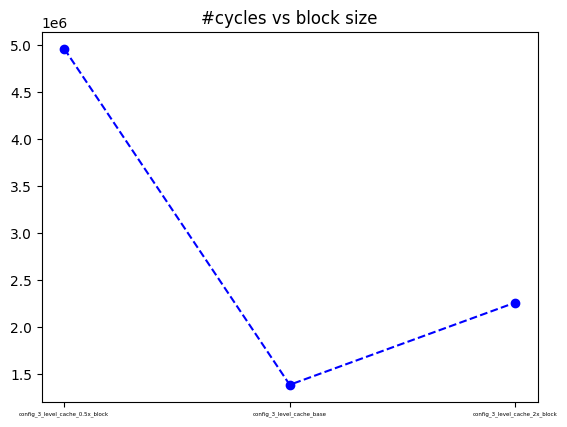

In [50]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_each_cache_data(axis[0], all_data["mat_transpose"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_transpose"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_rate(axis[0], all_data["mat_transpose"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_transpose"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_cycles(axis, all_data["mat_transpose"], "#cycles vs block size", experiments)

## Experiments on Cache Associativity 

Here we take the 3 level cache as base and reduce the associativity of L1 cache size by half, and also increase the base's L1 cache associativity twice. 

['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [26060, 23990, 23590] [5608, 5545, 5730] [725, 729, 720]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [57007, 59077, 59477] [15130, 14088, 14161] [4658, 4648, 4713]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [0.31372265761373347, 0.2888030144341315, 0.28398762444773495] [0.2704214485485582, 0.2824326389242602, 0.2880699813986225] [0.1346832621214936, 0.13557745954993491, 0.13252346769740475]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [0.6862773423862665, 0.7111969855658685, 0.716012375552265] [0.7295785514514418, 0.7175673610757398, 0.7119300186013775] [0.8653167378785064, 0.8644225404500651, 0.8674765323025952]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [2308291, 2271191, 22

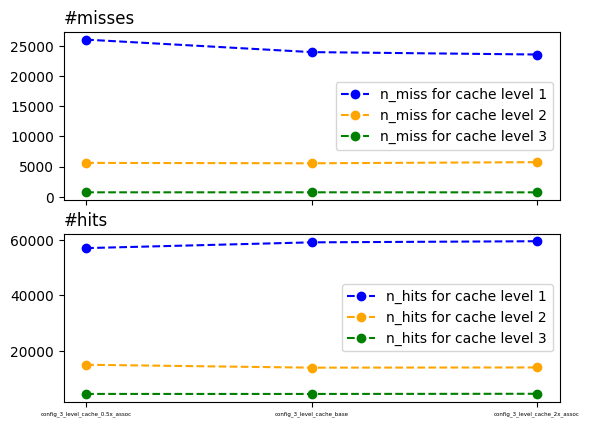

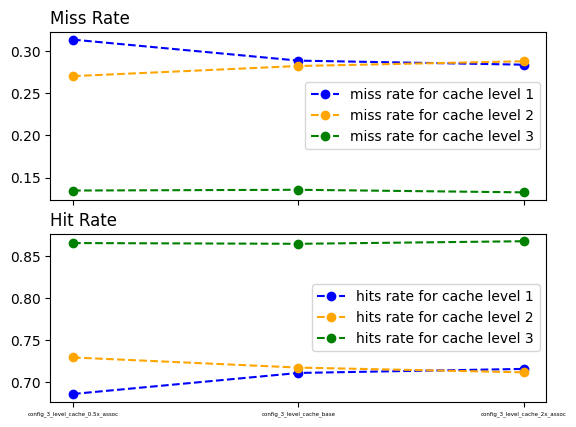

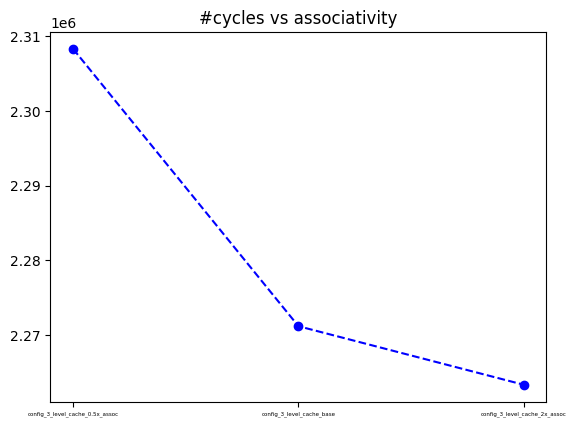

In [49]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_each_cache_data(axis[0], all_data["mat_transpose"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_transpose"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_rate(axis[0], all_data["mat_transpose"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_transpose"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_cycles(axis, all_data["mat_transpose"], "#cycles vs associativity", experiments)

## Experiments on Cache Capacity 

Here we take the 3 level cache as base and reduce the L1 cache capacity by half, and also increase the base's L1 cache capacity twice. 

['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [32048, 23990, 17060] [5916, 5545, 5766] [734, 729, 731]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [51019, 59077, 66007] [20194, 14088, 8695] [4798, 4648, 4611]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [0.38580904571008945, 0.2888030144341315, 0.20537638291981172] [0.226579854461892, 0.2824326389242602, 0.39872761219832653] [0.1326825741142444, 0.13557745954993491, 0.1368401347809809]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [0.6141909542899106, 0.7111969855658685, 0.7946236170801882] [0.773420145538108, 0.7175673610757398, 0.6012723878016735] [0.8673174258857556, 0.8644225404500651, 0.8631598652190191]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [2401015, 2161079, 2263359]


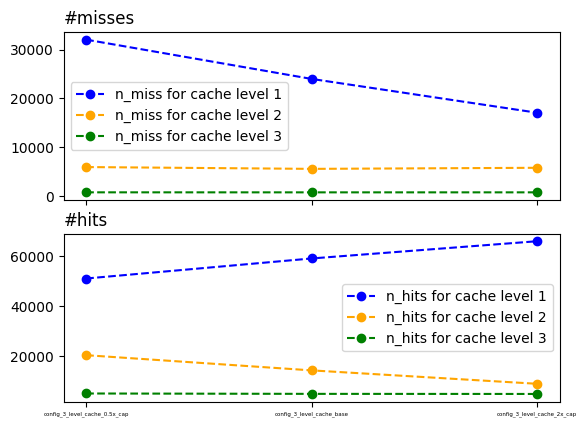

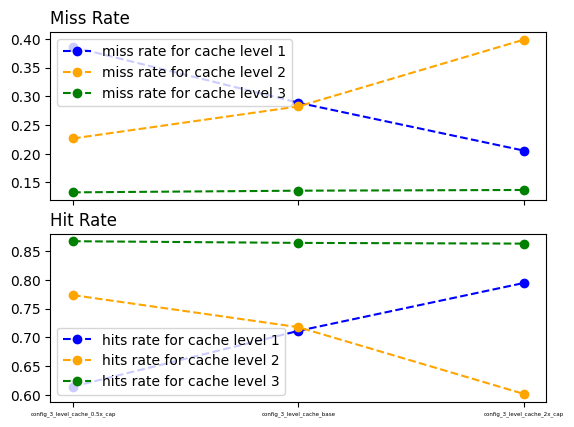

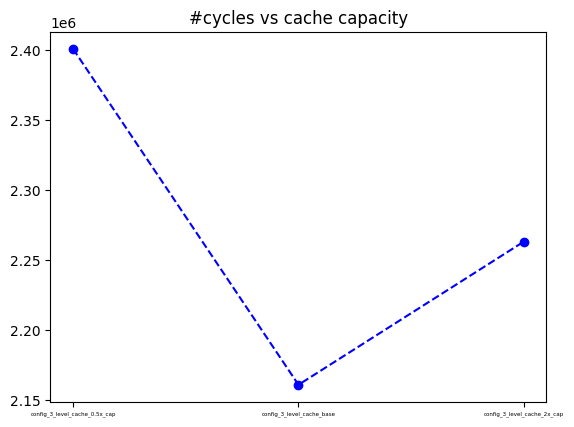

In [48]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_each_cache_data(axis[0], all_data["mat_transpose"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_transpose"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_rate(axis[0], all_data["mat_transpose"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_transpose"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_cycles(axis, all_data["mat_transpose"], "#cycles vs cache capacity", experiments)

## Experiments on number of cache layers 

Here we consider 3 level cache, 2 level cache and 1 level cache and plot amat vs cache layer graph

['config_1_level_cache_base', 'config_2_level_cache_base', 'config_3_level_cache_base'] [83067, 83067, 83067] [-1, 19633, 19633] [-1, -1, 5377]


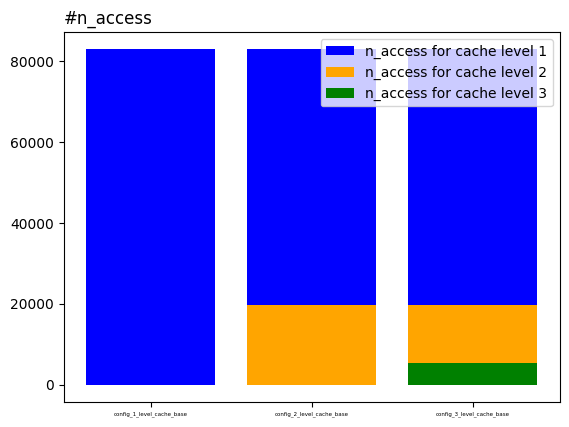

In [70]:
figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_1_level_cache_base", "config_2_level_cache_base", "config_3_level_cache_base"]
plot_amat(axis, all_data["mat_transpose"], "n_access", "#n_access", experiments)

We observe the following for transpose kernel after playing around with the cache parameters

* Increasing block size from 8 to 32. 
    - Increases #hits, hit rate for almost all caches
    - Decreases #cycles 
* Increasing associativity from 1 to 4
    - Reduces #misses, miss rate for L1 cache
    - Decreases #cycles
* Increasing cache capacity from 8 to 32
    - Increases #hits, hit rates
    - Decreases #cycles and then increases   

# **Cache Study - Column wise Matrix Copy Kernel**

Column wise matrix copy operation reads data column by column and then writes the entry to a new matrix. We theorize that this implementation, having minimal spatial and temporal locality will not be cache friendly.  

## Experiments on number of cache layers 

Here we consider 3 level cache, 2 level cache and 1 level cache and plot amat vs cache layer graph


['config_1_level_cache_base', 'config_2_level_cache_base', 'config_3_level_cache_base'] [27458, 27458, 27458] [-1, 5997, 5997] [-1, -1, 1982]


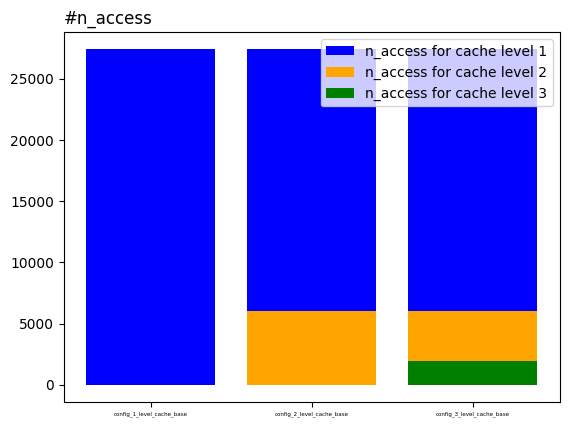

In [69]:
figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_1_level_cache_base", "config_2_level_cache_base", "config_3_level_cache_base"]
plot_amat(axis, all_data["mat_column_wise_copy"], "n_access", "#n_access", experiments)

## Experiments on Cache Capacity 

Here we take the 3 level cache as base and reduce the L1 cache capacity by half, and also increase the base's L1 cache capacity twice. 

['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [9420, 7112, 5230] [2270, 2133, 2075] [655, 646, 656]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [18038, 20346, 22228] [5504, 3864, 2322] [1408, 1336, 1262]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [0.3430694151067084, 0.25901376647971447, 0.1904727219753806] [0.29199897092873683, 0.35567783891945975, 0.47191266772799634] [0.3174987881725642, 0.32593340060544906, 0.3420229405630866]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [0.6569305848932916, 0.7409862335202855, 0.8095272780246194] [0.7080010290712632, 0.6443221610805403, 0.5280873322720037] [0.6825012118274357, 0.6740665993945509, 0.6579770594369134]
['config_3_level_cache_0.5x_cap', 'config_3_level_cache_base', 'config_3_level_cache_2x_cap'] [1366602, 1290974, 1329798]


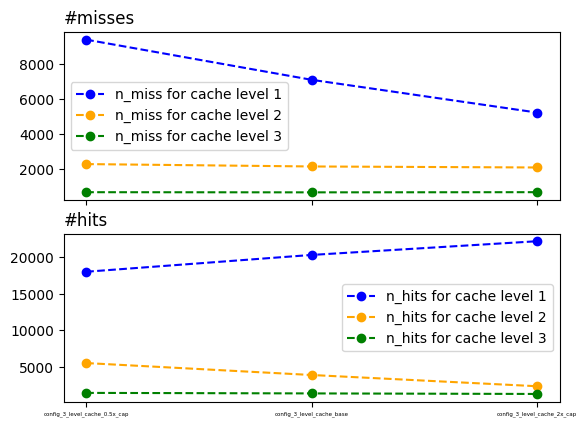

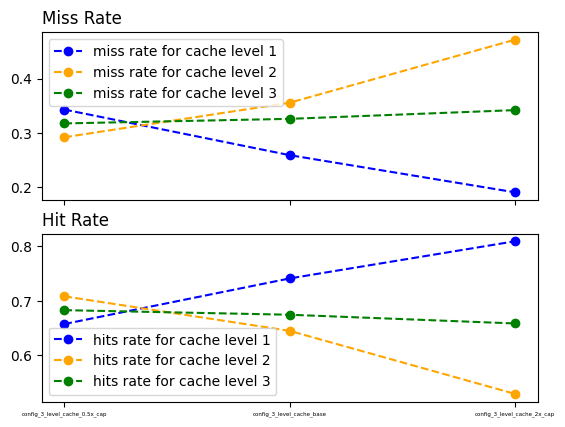

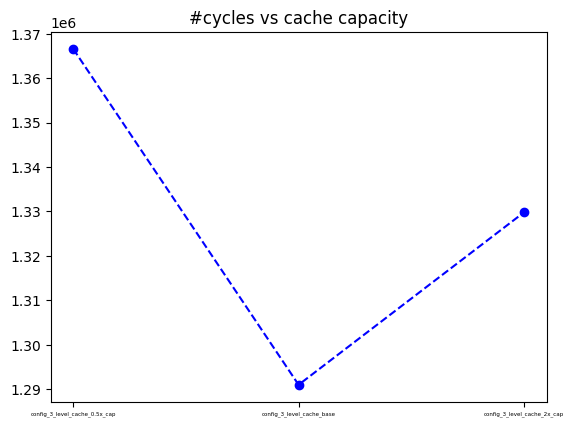

In [55]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_each_cache_data(axis[0], all_data["mat_column_wise_copy"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_column_wise_copy"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_rate(axis[0], all_data["mat_column_wise_copy"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_column_wise_copy"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_cap", "config_3_level_cache_base", "config_3_level_cache_2x_cap"]
plot_cycles(axis, all_data["mat_column_wise_copy"], "#cycles vs cache capacity", experiments)

## Experiments on Cache Associativity 

Here we take the 3 level cache as base and reduce the associativity of L1 cache size by half, and also increase the base's L1 cache associativity twice. 

['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [7630, 7112, 7083] [2122, 2133, 2162] [640, 646, 640]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [19828, 20346, 20375] [4170, 3864, 3886] [1350, 1336, 1355]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [0.27787894238473304, 0.25901376647971447, 0.25795760798310147] [0.33725365543547364, 0.35567783891945975, 0.357473544973545] [0.32160804020100503, 0.32593340060544906, 0.3208020050125313]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [0.7221210576152669, 0.7409862335202855, 0.7420423920168986] [0.6627463445645264, 0.6443221610805403, 0.642526455026455] [0.678391959798995, 0.6740665993945509, 0.6791979949874687]
['config_3_level_cache_0.5x_assoc', 'config_3_level_cache_base', 'config_3_level_cache_2x_assoc'] [1341498, 1331310, 1329798

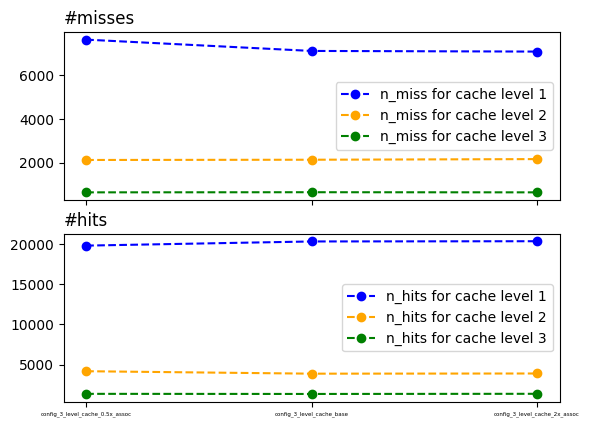

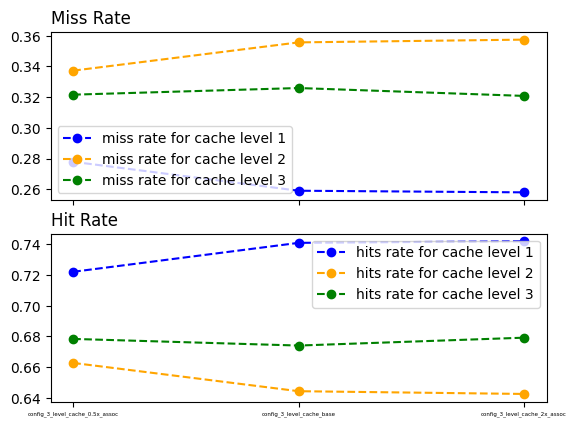

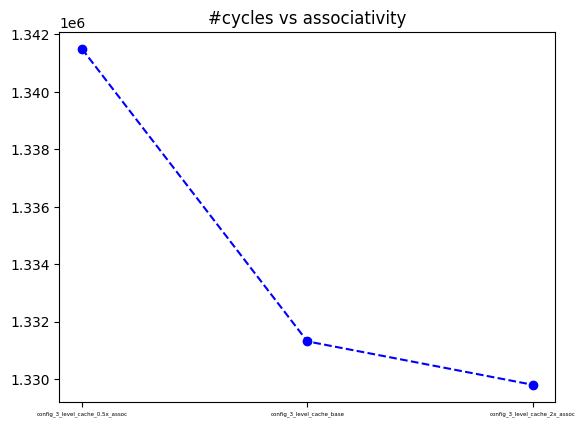

In [56]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_each_cache_data(axis[0], all_data["mat_column_wise_copy"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_column_wise_copy"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_rate(axis[0], all_data["mat_column_wise_copy"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_column_wise_copy"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_assoc", "config_3_level_cache_base", "config_3_level_cache_2x_assoc"]
plot_cycles(axis, all_data["mat_column_wise_copy"], "#cycles vs associativity", experiments)

## Experiments on Block size 

Here we take the 3 level cache as base and reduce its block size by half, and also increase the base's block size twice. 

['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [12277, 7112, 4501] [4634, 2133, 1029] [1215, 646, 441]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [15181, 20346, 22957] [5722, 3864, 2780] [2958, 1336, 550]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [0.44711923665234177, 0.25901376647971447, 0.16392308252603977] [0.4474700656624179, 0.35567783891945975, 0.27014964557626675] [0.291157440690151, 0.32593340060544906, 0.4450050454086781]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [0.5528807633476582, 0.7409862335202855, 0.8360769174739602] [0.5525299343375821, 0.6443221610805403, 0.7298503544237332] [0.7088425593098491, 0.6740665993945509, 0.5549949545913219]
['config_3_level_cache_0.5x_block', 'config_3_level_cache_base', 'config_3_level_cache_2x_block'] [2701426, 796362, 132979

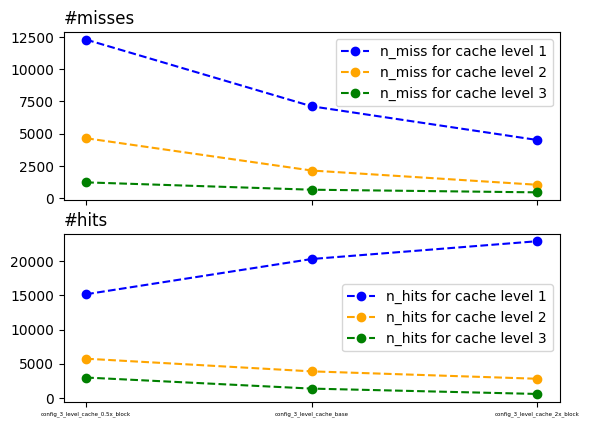

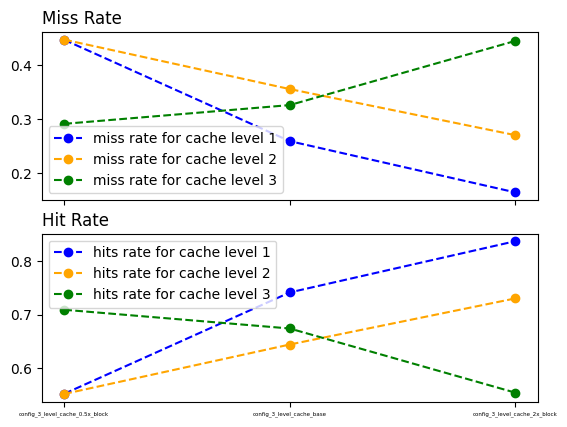

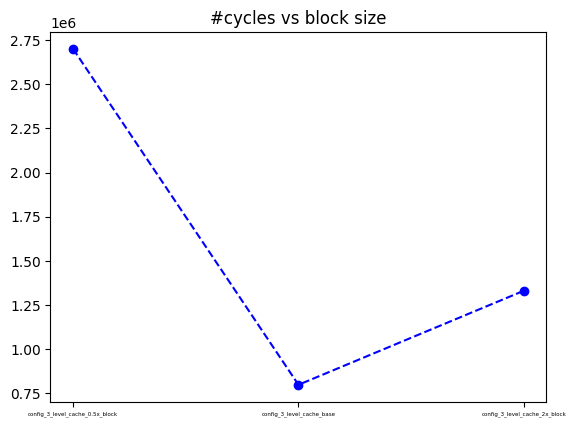

In [57]:
figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_each_cache_data(axis[0], all_data["mat_column_wise_copy"], "n_miss", "#misses", experiments)
plot_each_cache_data(axis[1], all_data["mat_column_wise_copy"], "n_hits", "#hits", experiments)

figure, axis = plt.subplots(2, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_rate(axis[0], all_data["mat_column_wise_copy"], "n_miss", "Miss Rate", experiments)
plot_rate(axis[1], all_data["mat_column_wise_copy"], "n_hits", "Hit Rate", experiments)

figure, axis = plt.subplots(1, sharex=True,)
experiments = ["config_3_level_cache_0.5x_block", "config_3_level_cache_base", "config_3_level_cache_2x_block"]
plot_cycles(axis, all_data["mat_column_wise_copy"], "#cycles vs block size", experiments)

We observe the following for column wise copy kernel after playing around with the cache parameters

* Increasing block size from 8 to 32. 
    - Increases #hits, hit rate for almost all caches
    - Decreases #cycles and then increases   
* Increasing associativity from 1 to 4
    - Reduces #misses, miss rate for L1 cache
    - Decreases #cycles   
* Increasing cache capacity from 8 to 32
    - Increases #hits, hit rates
    - Decreases #cycles and then increases   

# Conclusion 

As part of this exercise, we are able to understand how the architecture of cache systems impact the implementations of popular matrix operations. Although the current kernel codes analyzed as part of this assignment use naive implementation, we list down few possible optimizations here in order to work in future

* Block based matrix transpose 
    - Do matrix transpose on the input matrix a block level instead of matrix level.
    - This approach will use both temporal and spatial locality to the best 
* Scatter and Gather implementation using CSR matrix format
    - With increasing sparsity of the matrix, the CSR format based implementation would be a cache friendly algorithm



# References 
- [1]  H. Patil, R. Cohn, M. Charney, R. Kapoor, A. Sun and A. Karunanidhi, Pinpointing Representative 
Portions of Large Intel ® Itanium ® Programs with Dynamic Instrumentation 37th International 
Symposium on Microarchitecture (MICRO-37’04), 2004, pp. 81-92, doi: 
10.1109/MICRO.2004.28. 
- [2]  CacheSimulator, https://github.com/abhishekk06/CachePerformanceOnMatMul 
- [3]  GEM5 building, https://www.gem5.org/documentation/general_docs/building  